Setup

In [31]:
#Import various librarys and information sheet. File location may change
import pandas as pd
import matplotlib.pyplot as plot
import scipy.stats as stats

frame = pd.read_excel ('ExamSheet.xlsx')

Outliers Calculations and Boxplot

The asset Copier has a z-score of 12.75
The claimed replacement value is 50000
The asset Desk has a z-score of 19.26
The claimed replacement value is 75000


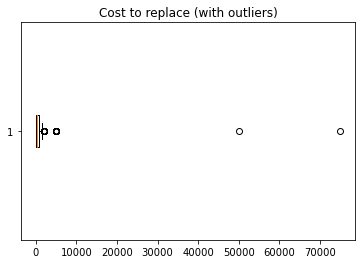

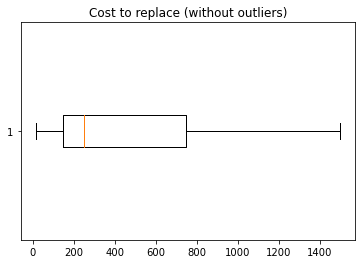

In [32]:
#Identify the primary data of problem
data = frame['CostToReplaceEach']

#Calculate z-scores
scores = stats.zscore(data)
outliers = []

#Identify outliers
for i in range(len(scores)):
    if(abs(scores[i]) >= 3):
        outliers.append(i)

#Print which assets are outliers, their z-score (rounded), and the claimed value
for asset in outliers:
    print("The asset " + str(frame['AssetName'][asset]) + " has a z-score of " + str(round(scores[asset], 2)) +
         "\nThe claimed replacement value is " + str(data[asset]))

#Create 2 boxplots, 1 with outliers, one without. With doesn't show much "normal" information, so second may be wanted.
fig1, ax1 = plot.subplots()
ax1.set_title("Cost to replace (with outliers)")
boxplot = ax1.boxplot(data, vert=False)

fig1, ax1 = plot.subplots()
ax1.set_title("Cost to replace (without outliers)")
boxplot = ax1.boxplot(data, vert=False, showfliers = False)

Expiring soon (more information in next box)

In [37]:
#Just the assets that will need to be replaced within the next year, no extra columns. Frankly this cell can be ignored
#Better information is in the next cell, I just like the table that this one gives. 
data = frame['LifespanRemaining']
soon = []

#Identify which assets will be expiring soon, filtering based on that, then printing
for i in range(len(data)):
    if(data[i] <= 1):
        soon.append(i)
newFrame = frame.filter(items=soon, axis=0)
newFrame

,Id,AssetName,Quantity,LifespanRemaining,SalvageValueEach,CostToReplaceEach,SalvageValueAll,CostToReplaceAll
1,2,Desk,5,1,100,750,500,3750
2,3,Monitor,3,1,25,250,75,750
4,5,Keyboard,5,1,0,50,0,250
5,6,Mouse,3,1,0,15,0,45
6,7,Wall art,17,1,25,250,425,4250
...,...,...,...,...,...,...,...,...
579,580,Desktop Computer,23,1,200,2000,4600,46000
586,587,Phone,16,1,25,200,400,3200
592,593,Bookcase,23,1,50,300,1150,6900
596,597,Desktop Computer,24,1,200,2000,4800,48000


Total Item Cost, Total Item Salvage, Expiring Soon, Overall Cost, Overall Salvage, and Overall Expense

In [42]:
data = frame['LifespanRemaining']

#Identify which assets will be expiring soon
soon = []

for i in range(len(data)):
    if(data[i] <= 1):
        soon.append(i)

#Grabbing the needed information from original dataframe
quant = frame['Quantity']
cost = frame['CostToReplaceEach']
salv = frame['SalvageValueEach']

#Copy of dataframe created to avoid potential complications from errors (i.e. editing a copy, not original)
extraCol = frame

totalCost = []
totalSalv = []

#Create new arrays with total values
for i in range(len(quant)):
    totalCost.append(quant[i] * cost[i])
    totalSalv.append(quant[i] * salv[i])

#Add new arrays to new dataframe
extraCol["SalvageValueAll"] = totalSalv
extraCol["CostToReplaceAll"] = totalCost

#Filter new dataframe to get items experieing soon, and printing again
extraCol = extraCol.filter(items=soon, axis=0)

print(extraCol)

#Calculating the total salvage values and costs
allSalv = 0
allCost = 0

salvVals = extraCol["SalvageValueAll"].values
costVals = extraCol["CostToReplaceAll"].values
for val in range(len(salvVals)):
    allSalv = allSalv + salvVals[val]
    allCost = allCost + costVals[val]

#Pri
print("The total costs expected for next year are $" + str(allCost) 
      + " and the total salvage value is $" 
      + str(allSalv) 
      + ".\nThe total expense for next year is $" 
      + str(abs(allSalv-allCost))
      + ".")

      Id         AssetName  Quantity  LifespanRemaining  SalvageValueEach  \
1      2              Desk         5                  1               100   
2      3           Monitor         3                  1                25   
4      5          Keyboard         5                  1                 0   
5      6             Mouse         3                  1                 0   
6      7          Wall art        17                  1                25   
..   ...               ...       ...                ...               ...   
579  580  Desktop Computer        23                  1               200   
586  587             Phone        16                  1                25   
592  593          Bookcase        23                  1                50   
596  597  Desktop Computer        24                  1               200   
598  599              Desk        23                  1               100   

     CostToReplaceEach  SalvageValueAll  CostToReplaceAll  
1              